In [67]:
import json
import typing as tp
import numpy as np
import matplotlib.pyplot as plt

Загрузим данные из файла json:

In [68]:
def load_json_data(filename: str) -> tp.Any:
    with open(filename, 'r') as file:
        data = json.load(file)
    return data

def read_transition_probability_matrix(data: tp.Any) -> np.ndarray:
    arr = np.array([0] * len(data['matrix'][0]))
    for row in data['matrix']:
        arr = np.vstack([arr, row])
    return np.delete(arr, 0, 0)

def read_initial_vectors(data: tp.Any) -> tuple[np.ndarray, np.ndarray]:
    return np.array(data['initial_vector_1']), np.array(data['initial_vector_2'])

Реализуем функцию для поиска стационарного состояния с помощью численного метода, которая также возвращает среднеквадратичные отклонения для построения графика:

In [69]:
def markov_chain_numerical(initial_vector: np.ndarray, transition_probability_matrix: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    current_vector = initial_vector
    standard_deviations = []
    while True:
        next_vector = np.dot(current_vector, transition_probability_matrix)
        s_dev = np.sqrt(np.mean((next_vector - current_vector) ** 2))
        standard_deviations.append(s_dev)
        if s_dev < 1e-6:
            current_vector = next_vector
            break
        current_vector = next_vector
    return np.array(standard_deviations), current_vector

Реализуем функцию для поиска стационарного состояния с помощью аналитического метода.
Известно, что решение можно найти, решив систему:

где π - искомое стационарное состояние. Заметим, что при перемножении этого состояния а матрицу перехода получается это же состояние, значит это собственный вектор матрицы. Остаяется лишь найти нужный собственный вектор (из всех найденных собственных векторов выбирается тот, который соответствует собственному значению, близкому к 1, и нормируется с помощью деления на сумму его элементов):

In [70]:
def markov_chain_analytical(transition_probability_matrix: np.ndarray) -> np.ndarray:
    eigenvalues, eigenvectors = np.linalg.eig(transition_probability_matrix.T)
    stationary_vector = np.real(eigenvectors[:, np.isclose(eigenvalues, 1)])
    stationary_vector = stationary_vector / np.sum(stationary_vector)
    return stationary_vector.flatten()

Протестируем код на наших данных:

Решение, полученное численным методом для первого вектора начальных состояний:
[0.22595876 0.09705494 0.11935459 0.14152637 0.18979153 0.02983845
 0.16212579 0.03434958]
Решение, полученное численным методом для второго вектора начальных состояний:
[0.22595705 0.09705931 0.11935546 0.14152522 0.18979088 0.02983902
 0.16212344 0.03434962]
Решение, полученное аналитически:
[0.22595805 0.09705689 0.11935496 0.14152574 0.18979117 0.02983874
 0.16212488 0.03434957]


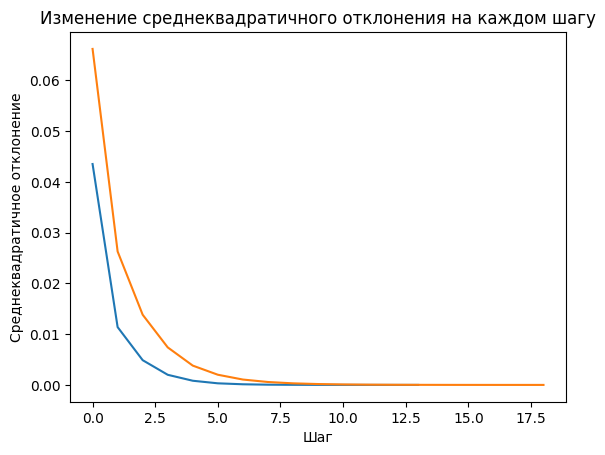

In [72]:
data = load_json_data("C:/Users/irmar/Desktop/Prog/lab3/data.json")
matrix = read_transition_probability_matrix(data)
initial_vector1, initial_vector2 = read_initial_vectors(data)

standard_deviations1, stationary_vector_numerical1 = markov_chain_numerical(initial_vector1, matrix)
standard_deviations2, stationary_vector_numerical2 = markov_chain_numerical(initial_vector2, matrix)

stationary_vector_analytical = markov_chain_analytical(matrix)

print("Решение, полученное численным методом для первого вектора начальных состояний:")
print(stationary_vector_numerical1)
print("Решение, полученное численным методом для второго вектора начальных состояний:")
print(stationary_vector_numerical2)
print("Решение, полученное аналитически:")
print(stationary_vector_analytical)

plt.plot(np.arange(standard_deviations1.shape[0]), standard_deviations1)
plt.plot(np.arange(standard_deviations2.shape[0]), standard_deviations2)
plt.xlabel('Шаг')
plt.ylabel('Среднеквадратичное отклонение')
plt.title('Изменение среднеквадратичного отклонения на каждом шагу')
plt.show()